In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import wandb
from wandb.keras import WandbCallback

In [2]:
img = np.full((800, 800, 3), 255, np.uint8)

In [3]:
thickness = 2

cv2.rectangle(img, (100, 200), (700, 600), (255, 0, 0), thickness=thickness)
cv2.line(img, (100, 200), (700, 600), (255, 0, 0), thickness=thickness)
cv2.line(img, (700, 200), (100, 600), (255, 0, 0), thickness=thickness)

img2 = np.zeros_like(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(th)

In [4]:
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255], [255, 174, 0], [0,0,0]] # red, green, blue, sky, orange, black

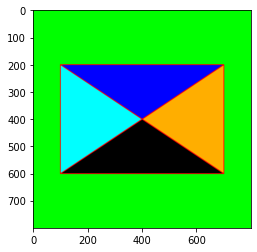

In [5]:
for i in range(cnt):
    # img2[labels==i] = [int(j) for j in np.random.randint(0, 255, 3)]
    img2[labels==i] = colors[i]

plt.imshow(img2)

In [6]:
temp = img2.copy()

In [7]:
temp[150][140] = [0,0,0]#[[0,0,0] for _ in range(800)]

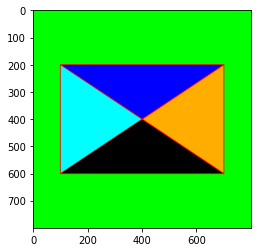

In [8]:
plt.imshow(temp)

In [9]:
data = pd.DataFrame(columns=['x','y','label'])

In [10]:
for _ in range(10000):
    x = np.random.randint(0, 800)
    y = np.random.randint(0, 800)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    data = data.append(temp, ignore_index=True)

X_data = data.drop(columns=['label']).values
y_data = data['label'].values

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.int32)
# X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)
# y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [11]:
data

,x,y,label
0,420,575,5
1,79,580,1
2,55,49,1
3,393,602,1
4,740,444,1
...,...,...,...
9995,273,404,3
9996,246,242,2
9997,123,297,3
9998,570,789,1


In [12]:
model = Sequential([
    InputLayer(input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 17,158
Trainable params: 17,158
Non-trainable params: 0
_________________________________________________________________


In [17]:
wandb.init(project="Innopia4", entity="yhkim")
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 300,
  "batch_size" : 128
}

model.compile(optimizer=Adam(learning_rate=wandb.config['learning_rate']), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=wandb.config['batch_size'], validation_batch_size=wandb.config['batch_size'], epochs=wandb.config['epochs'], callbacks=[WandbCallback()])
wandb.finish()

wandb: wandb version 0.13.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


Epoch 1/300
63/63 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.9730 - val_loss: 0.1107 - val_accuracy: 0.9740
Epoch 2/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.9775 - val_loss: 0.1070 - val_accuracy: 0.9755
Epoch 3/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9769 - val_loss: 0.1106 - val_accuracy: 0.9710
Epoch 4/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9778 - val_loss: 0.1103 - val_accuracy: 0.9725
Epoch 5/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9776 - val_loss: 0.1084 - val_accuracy: 0.9730
Epoch 6/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9779 - val_loss: 0.1091 - val_accuracy: 0.9670
Epoch 7/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9779 - val_loss: 0.1040 - val_accuracy: 0.9755
Epoch 8/300
6

Epoch 59/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9805 - val_loss: 0.0885 - val_accuracy: 0.9740
Epoch 60/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9786 - val_loss: 0.0873 - val_accuracy: 0.9765
Epoch 61/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9762 - val_loss: 0.0969 - val_accuracy: 0.9700
Epoch 62/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9779 - val_loss: 0.0900 - val_accuracy: 0.9760
Epoch 63/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9804 - val_loss: 0.0863 - val_accuracy: 0.9790
Epoch 64/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9804 - val_loss: 0.0957 - val_accuracy: 0.9720
Epoch 65/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9796 - val_loss: 0.0897 - val_accuracy: 0.9725
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9822 - val_loss: 0.0813 - val_accuracy: 0.9775
Epoch 117/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9766 - val_loss: 0.0844 - val_accuracy: 0.9730
Epoch 118/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9750 - val_loss: 0.0808 - val_accuracy: 0.9760
Epoch 119/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9815 - val_loss: 0.0848 - val_accuracy: 0.9740
Epoch 120/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 0.9827 - val_loss: 0.0788 - val_accuracy: 0.9775
Epoch 121/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9833 - val_loss: 0.0781 - val_accuracy: 0.9785
Epoch 122/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9834 - val_loss: 0.0763 - val_accuracy: 0.9770
Epoch 123/300

63/63 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0783 - val_accuracy: 0.9755
Epoch 174/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9829 - val_loss: 0.0757 - val_accuracy: 0.9750
Epoch 175/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0819 - val_accuracy: 0.9710
Epoch 176/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.0733 - val_accuracy: 0.9780
Epoch 177/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9821 - val_loss: 0.0734 - val_accuracy: 0.9770
Epoch 178/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0833 - val_accuracy: 0.9750
Epoch 179/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9794 - val_loss: 0.0876 - val_accuracy: 0.9725
Epoch 180/300

63/63 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0841 - val_accuracy: 0.9680
Epoch 231/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9739 - val_loss: 0.1077 - val_accuracy: 0.9630
Epoch 232/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9754 - val_loss: 0.0895 - val_accuracy: 0.9660
Epoch 233/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9821 - val_loss: 0.0935 - val_accuracy: 0.9755
Epoch 234/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9822 - val_loss: 0.0759 - val_accuracy: 0.9800
Epoch 235/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9815 - val_loss: 0.0787 - val_accuracy: 0.9710
Epoch 236/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0708 - val_accuracy: 0.9795
Epoch 237/300

63/63 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0739 - val_accuracy: 0.9760
Epoch 288/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 0.0735 - val_accuracy: 0.9770
Epoch 289/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9849 - val_loss: 0.0775 - val_accuracy: 0.9770
Epoch 290/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9809 - val_loss: 0.0777 - val_accuracy: 0.9770
Epoch 291/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.9770 - val_loss: 0.0844 - val_accuracy: 0.9770
Epoch 292/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0717 - val_accuracy: 0.9775
Epoch 293/300
63/63 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 294/300

accuracy,▃▂▃▂▁▅▅▃▅▂▄▆▅▄▄▆▇▇▄▅▇▅▇▆▆▄▆▇▆█▆▆▄▆▄▆▇▃█▆
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,██▇▇▇▅▅▅▄▅▄▃▄▃▄▃▃▃▄▃▂▃▂▂▂▃▂▂▂▁▂▃▃▂▂▂▁▄▁▂
val_accuracy,▄▃▄▄▂▅▇▇▄▄▆▆▅▆▅▇▃▄▄▄▆▂█▇▆▄▁▇▂▆▄█▄▅▃▅▃▇▇▆
val_loss,██▇▆▇▅▄▄▅▄▄▄▄▂▃▃▄▂▆▂▃▄▁▁▂▃▆▃▅▂▂▁▄▃▂▃▄▁▁▂
accuracy,0.98225
best_epoch,253
best_val_loss,0.07019
epoch,299
loss,0.0553
val_accuracy,0.9755


In [14]:
test_data = pd.DataFrame(columns=['x','y','label'])
for _ in range(10000):
    x = np.random.randint(0, 800)
    y = np.random.randint(0, 800)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    test_data = test_data.append(temp, ignore_index=True)

In [15]:
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [18]:
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9784


[0.07072202116250992, 0.9783999919891357]

- Adam lr : 0.01
 1. [0.15516355633735657, 0.9478999972343445]
 
- Adam lr : 0.01
 2. [0.07072202116250992, 0.9783999919891357]